# EXERCICI 1

## · descarregar el dataset i classificar els registres utilitzant l'algorisme K-means

In [1]:
# step_1: import packages and classes pel dataset

import numpy as np
import pandas as pd

# descàrrega del dataset
fb = pd.read_csv('FB_T.csv')
fb.head()

,status_type,day_published,month_published,year_published,hour_published,minute_published,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,22,4,2018,6,0,262,432,92,3,1,1,0
1,photo,21,4,2018,22,45,0,150,0,0,0,0,0
2,video,21,4,2018,6,17,57,204,21,1,1,0,0
3,photo,21,4,2018,2,29,0,111,0,0,0,0,0
4,photo,18,4,2018,3,22,0,204,9,0,0,0,0


In [2]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       7050 non-null   object
 1   day_published     7050 non-null   int64 
 2   month_published   7050 non-null   int64 
 3   year_published    7050 non-null   int64 
 4   hour_published    7050 non-null   int64 
 5   minute_published  7050 non-null   int64 
 6   num_shares        7050 non-null   int64 
 7   num_likes         7050 non-null   int64 
 8   num_loves         7050 non-null   int64 
 9   num_wows          7050 non-null   int64 
 10  num_hahas         7050 non-null   int64 
 11  num_sads          7050 non-null   int64 
 12  num_angrys        7050 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 716.1+ KB


In [3]:
fb.describe()

,day_published,month_published,year_published,hour_published,minute_published,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,15.792624,6.577730,2016.382128,7.829504,27.528936,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,8.728489,3.587108,1.943176,6.886893,17.613119,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,1.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,3.000000,2016.000000,2.000000,12.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,6.000000,2017.000000,7.000000,26.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,10.000000,2018.000000,9.000000,43.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,12.000000,2018.000000,23.000000,59.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [4]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [5]:
! pip install kneed # To install only knee-detection algorithm

In [6]:
! pip install kneed[plot] # To also install plotting functions for quick visualizations

zsh:1: no matches found: kneed[plot]


In [7]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [8]:
features, true_labels = make_blobs(
    n_samples=7000,
    centers=7,
    cluster_std=2.75,
    random_state=53
)

In [9]:
features[:5]

array([[ -1.77997061,   2.50756902],
       [  1.86996443,  -0.56024735],
       [ -9.80268302,  -1.86339522],
       [-11.24526055,   0.27796483],
       [ 11.81349275,   2.42218942]])

In [10]:
true_labels[:5]

array([1, 0, 6, 6, 0])

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [12]:
scaled_features[:5]

array([[-0.21991013,  1.35045643],
       [ 0.35553732,  0.4724472 ],
       [-1.4847681 ,  0.09948619],
       [-1.71220436,  0.71234357],
       [ 1.92323043,  1.32602078]])

In [15]:
# algoritme k-means

kmeans = KMeans(
    init="random", # tècnica d'inicialització (versio standard ajustant init a random)
    n_clusters=7, # pasos d'agrupament (paràmetre més important de k-means)
    n_init=10, # número d'execucions a fer (exemple:10)
    max_iter=750, # nñumero màxim d'interaccions per execució
    random_state=53
)

In [16]:
# per cridar atributs de k-means .fit

kmeans.fit(scaled_features)

KMeans(init='random', max_iter=750, n_clusters=7, random_state=53)

In [17]:
# valor més baix de SSE

kmeans.inertia_

2556.3829457801303

In [18]:
# ubicacions dels centroides (total 7 com el n_clusters)

kmeans.cluster_centers_

array([[ 0.03484659,  0.88592459],
       [ 1.13617205,  0.09545659],
       [-0.05169846, -0.32114227],
       [ 1.02035381,  1.57868972],
       [-1.12270903, -1.12083464],
       [ 0.88544876, -1.28921735],
       [-1.3361717 ,  0.33069014]])

In [19]:
# número iteracions necessàries per convergir

kmeans.n_iter_

29

In [20]:
# assignacions de clusters enmagatzemades com array unidimensional

kmeans.labels_[:5] #5 primeres etiquetes

array([0, 0, 6, 6, 3], dtype=int32)

In [21]:
# ordre de  les etiquetes dels clusters depén de  la inicilialització 
# true_labels -> array([1, 0, 6, 6, 0])
# kmeans.labels_ -> array([0, 0, 6, 6, 3], dtype=int32)
# no afecta a les mètriques d'avaluació de clustering

# EXERCICI 2

## · classificació dels diferents registres utilitzant l'algorisme de clustering jeràrquic

In [22]:
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [25]:
X = fb.iloc[:, [3, 4]].values

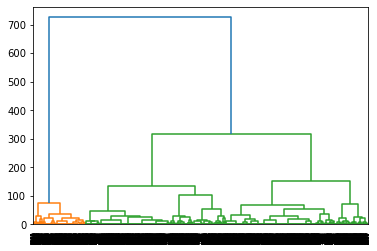

In [26]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [27]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

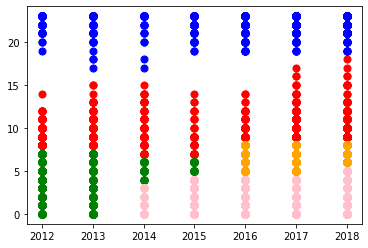

In [30]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='pink')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

In [24]:



from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()


import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

FileNotFoundError: [Errno 2] No such file or directory: './data.csv'